# Web Ad Optimization using Upper Confidence Bound (UCB) Algorithm

## Overview
This notebook implements the UCB algorithm for optimizing web ad selection. The UCB algorithm solves the Multi-Armed Bandit problem by balancing exploration (trying new ads) and exploitation (showing the best performing ads).

### Dataset
- **File**: dataset.csv
- **Rows**: 10,001 (1 header + 10,000 rounds)
- **Columns**: Ad 1 through Ad 10 (binary: 1=click, 0=no click)

### Algorithm: Upper Confidence Bound (UCB)
**Formula**: Average Reward + sqrt(ln(N) / n_i)
- Average Reward: Total clicks / number of selections for ad i
- N: Total number of rounds
- n_i: Number of times ad i was selected

The algorithm selects the ad with the highest UCB value at each round.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import math
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. UCB Algorithm Implementation

In [2]:
class UCBOptimizer:
    """
    Upper Confidence Bound Algorithm for Multi-Armed Bandit Problem
    
    The UCB algorithm balances exploration (trying different ads) and 
    exploitation (showing the best performing ads) using an upper confidence bound.
    """
    
    def __init__(self, num_ads):
        """
        Initialize UCB optimizer
        
        Args:
            num_ads (int): Number of ads to test
        """
        self.num_ads = num_ads
        self.ad_selections = np.zeros(num_ads)  # Number of times each ad was selected
        self.ad_rewards = np.zeros(num_ads)     # Total reward for each ad
        self.total_rounds = 0                    # Total rounds played
        
    def select_ad(self, round_num):
        """
        Select an ad using the UCB algorithm
        
        Formula: Average Reward + sqrt(ln(N) / n_i)
        Where:
            - Average Reward: total reward / number of selections for ad i
            - N: total number of rounds
            - n_i: number of times ad i was selected
        
        Args:
            round_num (int): Current round number (1-indexed)
        
        Returns:
            int: Index of selected ad (0-indexed)
        """
        self.total_rounds = round_num
        
        # Initially select each ad once (exploration phase)
        if round_num <= self.num_ads:
            return round_num - 1
        
        ucb_values = np.zeros(self.num_ads)
        
        for i in range(self.num_ads):
            average_reward = self.ad_rewards[i] / self.ad_selections[i]
            confidence_bound = math.sqrt(math.log(round_num) / self.ad_selections[i])
            ucb_values[i] = average_reward + confidence_bound
        
        # Select ad with highest UCB value
        return np.argmax(ucb_values)
    
    def update_reward(self, ad_index, reward):
        """
        Update reward for selected ad
        
        Args:
            ad_index (int): Index of selected ad
            reward (int): Reward received (0 or 1 for click/no-click)
        """
        self.ad_selections[ad_index] += 1
        self.ad_rewards[ad_index] += reward
    
    def get_statistics(self):
        """
        Get current statistics
        
        Returns:
            dict: Statistics including selections, rewards, and conversion rates
        """
        stats = {
            'ad_selections': self.ad_selections.copy(),
            'ad_rewards': self.ad_rewards.copy(),
            'conversion_rates': self.ad_rewards / self.ad_selections,
            'total_reward': np.sum(self.ad_rewards),
            'average_reward': np.sum(self.ad_rewards) / self.total_rounds
        }
        return stats

print("✓ UCBOptimizer class defined")

✓ UCBOptimizer class defined


## 3. Data Loading Functions

In [3]:
def load_dataset(dataset_path):
    """
    Load the ad optimization dataset
    
    Args:
        dataset_path (str): Path to the dataset CSV file
    
    Returns:
        pd.DataFrame: Dataset with ad columns
    """
    if not Path(dataset_path).exists():
        raise FileNotFoundError(f"Dataset not found at {dataset_path}")
    
    df = pd.read_csv(dataset_path)
    
    if df.empty:
        raise ValueError("Dataset is empty")
    
    expected_cols = [f'Ad {i}' for i in range(1, 11)]
    if not all(col in df.columns for col in expected_cols):
        raise ValueError(f"Dataset must contain columns: {expected_cols}")
    
    return df

def get_dataset_info(df):
    """
    Get information about the dataset
    
    Args:
        df (pd.DataFrame): Dataset
    
    Returns:
        dict: Dataset information
    """
    info = {
        'num_rounds': len(df),
        'num_ads': len([col for col in df.columns if col.startswith('Ad ')]),
        'columns': list(df.columns),
        'shape': df.shape
    }
    return info

def get_ad_reward(df, round_num, ad_index):
    """
    Get the reward (click or no-click) for an ad at a specific round
    
    Args:
        df (pd.DataFrame): Dataset
        round_num (int): Round number (0-indexed)
        ad_index (int): Ad index (0-indexed)
    
    Returns:
        int: Reward (0 or 1)
    """
    ad_column = f'Ad {ad_index + 1}'
    return int(df.loc[round_num, ad_column])

print("✓ Data loading functions defined")

✓ Data loading functions defined


## 4. Load Dataset

In [4]:
# Define dataset path
current_dir = Path.cwd()
dataset_path = current_dir / 'dataset.csv'

# Load dataset
print("Loading dataset...")
df = load_dataset(str(dataset_path))
info = get_dataset_info(df)

print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Total rounds: {info['num_rounds']:,}")
print(f"Number of ads: {info['num_ads']}")
print(f"Ads: {', '.join(info['columns'])}")
print(f"Shape: {info['shape']}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData types:\n{df.dtypes}")

Loading dataset...

DATASET INFORMATION
Total rounds: 10,000
Number of ads: 10
Ads: Ad 1, Ad 2, Ad 3, Ad 4, Ad 5, Ad 6, Ad 7, Ad 8, Ad 9, Ad 10
Shape: (10000, 10)

First 5 rows:
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0

Data types:
Ad 1     int64
Ad 2     int64
Ad 3     int64
Ad 4     int64
Ad 5     int64
Ad 6     int64
Ad 7     int64
Ad 8     int64
Ad 9     int64
Ad 10    int64
dtype: object


## 5. Run UCB Simulation

In [5]:
# Initialize UCB optimizer
print("\nInitializing UCB Optimizer...")
num_ads = info['num_ads']
ucb = UCBOptimizer(num_ads)
print(f"✓ UCB Optimizer initialized with {num_ads} ads")

# Run simulation
print(f"\nRunning UCB simulation on {info['num_rounds']:,} rounds...")
print("\nProgress: ", end='', flush=True)

selection_history = []
reward_history = []

for round_num in range(1, info['num_rounds'] + 1):
    # UCB selects an ad
    ad_index = ucb.select_ad(round_num)
    
    # Get reward for selected ad
    reward = get_ad_reward(df, round_num - 1, ad_index)
    
    # Update UCB with reward
    ucb.update_reward(ad_index, reward)
    
    # Store history
    selection_history.append(ad_index)
    reward_history.append(reward)
    
    # Progress indicator
    if round_num % 1000 == 0:
        print(f"{round_num:,}", end=' ', flush=True)

print("✓ Complete!")

# Get final statistics
stats = ucb.get_statistics()

print("\n" + "="*70)
print("SIMULATION RESULTS")
print("="*70)
print(f"Total clicks: {int(stats['total_reward'])} out of {info['num_rounds']:,}")
print(f"Overall CTR: {stats['average_reward']:.4f} ({stats['average_reward']*100:.2f}%)")


Initializing UCB Optimizer...
✓ UCB Optimizer initialized with 10 ads

Running UCB simulation on 10,000 rounds...

Progress: 1,000 2,000 3,000 4,000 5,000 6,000 7,000 8,000 9,000 10,000 ✓ Complete!

SIMULATION RESULTS
Total clicks: 2358 out of 10,000
Overall CTR: 0.2358 (23.58%)


## 6. Ad Performance Analysis

In [6]:
# Create DataFrame with ad statistics
ad_stats = pd.DataFrame({
    'Ad': [f'Ad {i+1}' for i in range(num_ads)],
    'Selections': stats['ad_selections'].astype(int),
    'Clicks': stats['ad_rewards'].astype(int),
    'Conversion_Rate': stats['conversion_rates'],
    'Avg_Reward': stats['ad_rewards'] / stats['ad_selections']
})

ad_stats_sorted = ad_stats.sort_values('Conversion_Rate', ascending=False)

print("\n" + "="*70)
print("AD PERFORMANCE (Sorted by Conversion Rate)")
print("="*70)
print(ad_stats_sorted.to_string(index=False))

print(f"\n\nKey Insights:")
best_ad = ad_stats_sorted.iloc[0]
worst_ad = ad_stats_sorted.iloc[-1]
print(f"  • Best Performer: {best_ad['Ad']} (CTR: {best_ad['Conversion_Rate']:.4f}, Selections: {int(best_ad['Selections'])})")
print(f"  • Worst Performer: {worst_ad['Ad']} (CTR: {worst_ad['Conversion_Rate']:.4f}, Selections: {int(worst_ad['Selections'])})")
print(f"  • UCB Learning Effect: Top ad selected {int(best_ad['Selections'])} times ({best_ad['Selections']/info['num_rounds']*100:.1f}% of rounds)")


AD PERFORMANCE (Sorted by Conversion Rate)
   Ad  Selections  Clicks  Conversion_Rate  Avg_Reward
 Ad 5        7394    2006         0.271301    0.271301
 Ad 8         696     132         0.189655    0.189655
 Ad 1         615     112         0.182114    0.182114
 Ad 4         259      30         0.115830    0.115830
 Ad 9         240      26         0.108333    0.108333
 Ad 2         195      17         0.087179    0.087179
 Ad 3         190      16         0.084211    0.084211
 Ad 7         169      12         0.071006    0.071006
Ad 10         136       6         0.044118    0.044118
 Ad 6         106       1         0.009434    0.009434


Key Insights:
  • Best Performer: Ad 5 (CTR: 0.2713, Selections: 7394)
  • Worst Performer: Ad 6 (CTR: 0.0094, Selections: 106)
  • UCB Learning Effect: Top ad selected 7394 times (73.9% of rounds)


## 7. Visualizations - Ad Performance

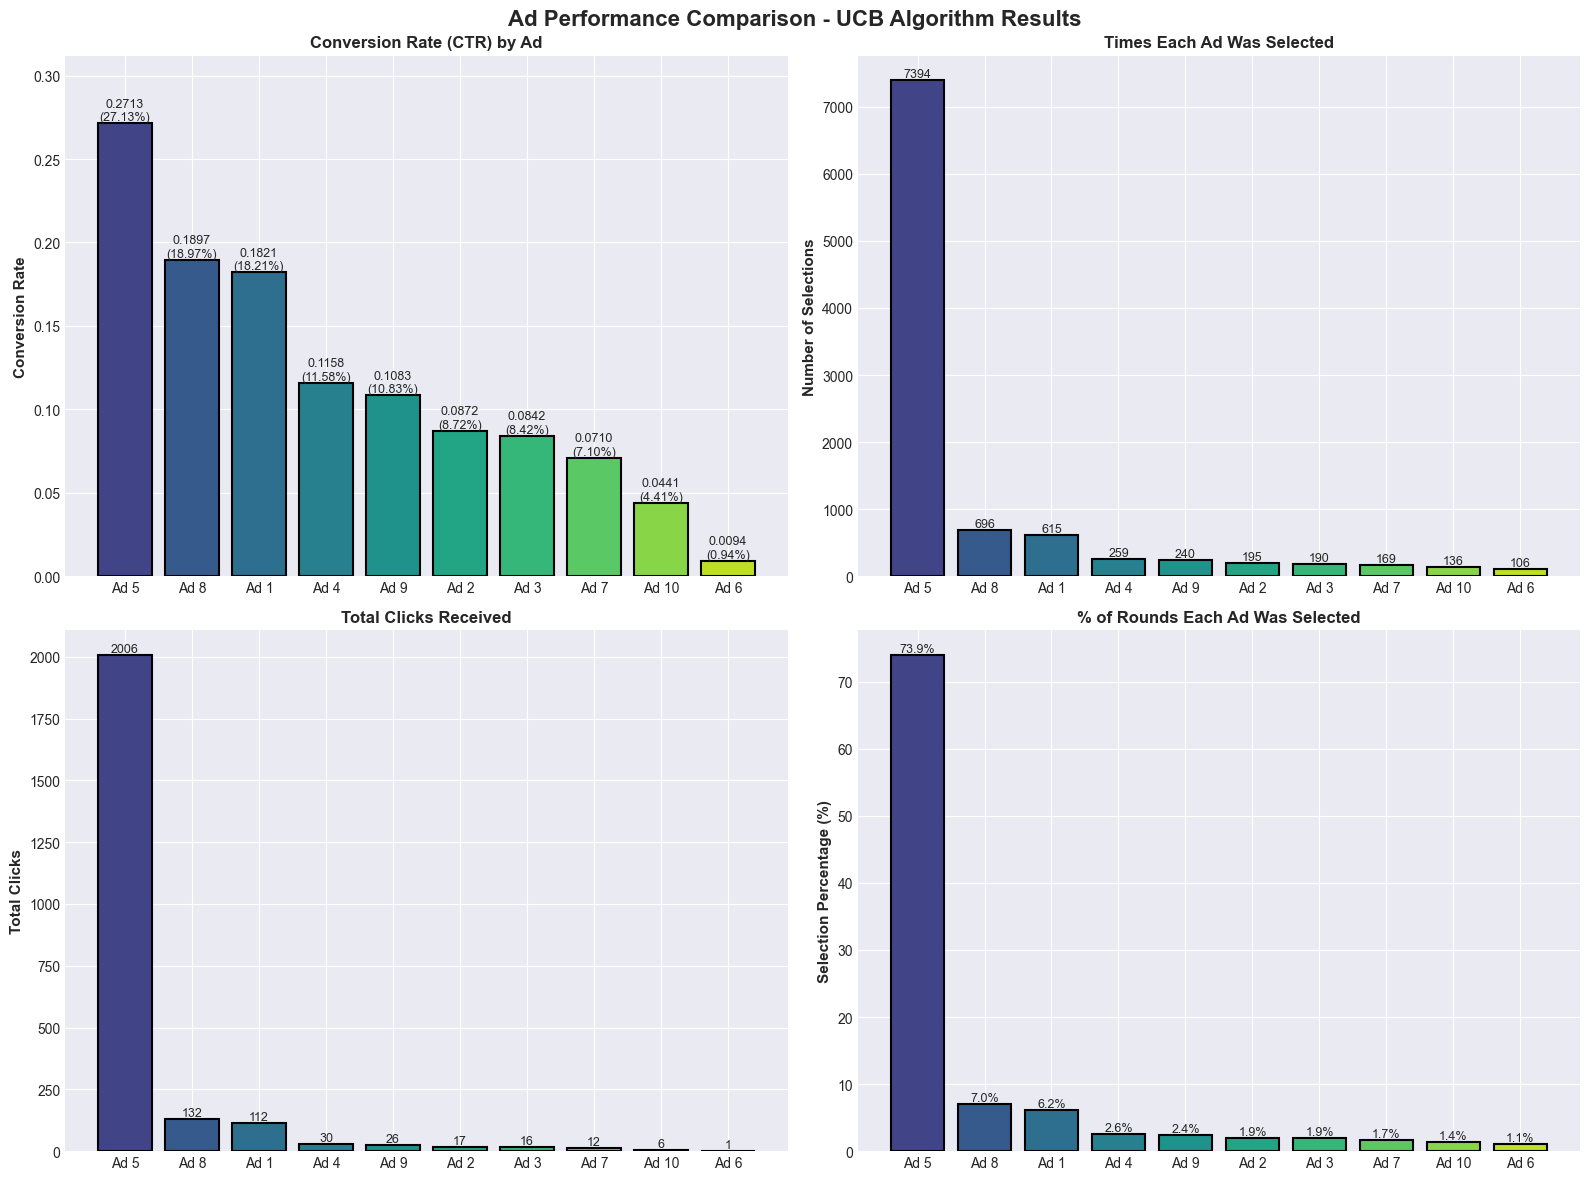

✓ Ad performance chart saved as 'ad_performance.png'


In [7]:
# Create comprehensive ad performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ad Performance Comparison - UCB Algorithm Results', fontsize=16, fontweight='bold')

ads = ad_stats_sorted['Ad']
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(ads)))

# Plot 1: Conversion Rate
ax1 = axes[0, 0]
conv_rates = ad_stats_sorted['Conversion_Rate']
bars1 = ax1.bar(ads, conv_rates, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Conversion Rate', fontweight='bold', fontsize=11)
ax1.set_title('Conversion Rate (CTR) by Ad', fontweight='bold')
ax1.set_ylim(0, max(conv_rates) * 1.15)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}\n({height*100:.2f}%)', ha='center', va='bottom', fontsize=9)

# Plot 2: Number of Selections
ax2 = axes[0, 1]
selections = ad_stats_sorted['Selections']
bars2 = ax2.bar(ads, selections, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Number of Selections', fontweight='bold', fontsize=11)
ax2.set_title('Times Each Ad Was Selected', fontweight='bold')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 3: Total Clicks
ax3 = axes[1, 0]
clicks = ad_stats_sorted['Clicks']
bars3 = ax3.bar(ads, clicks, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Total Clicks', fontweight='bold', fontsize=11)
ax3.set_title('Total Clicks Received', fontweight='bold')
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 4: Selection Percentage
ax4 = axes[1, 1]
selection_pct = (selections / info['num_rounds']) * 100
bars4 = ax4.bar(ads, selection_pct, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Selection Percentage (%)', fontweight='bold', fontsize=11)
ax4.set_title('% of Rounds Each Ad Was Selected', fontweight='bold')
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('ad_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Ad performance chart saved as 'ad_performance.png'")

## 8. Visualizations - Convergence Analysis

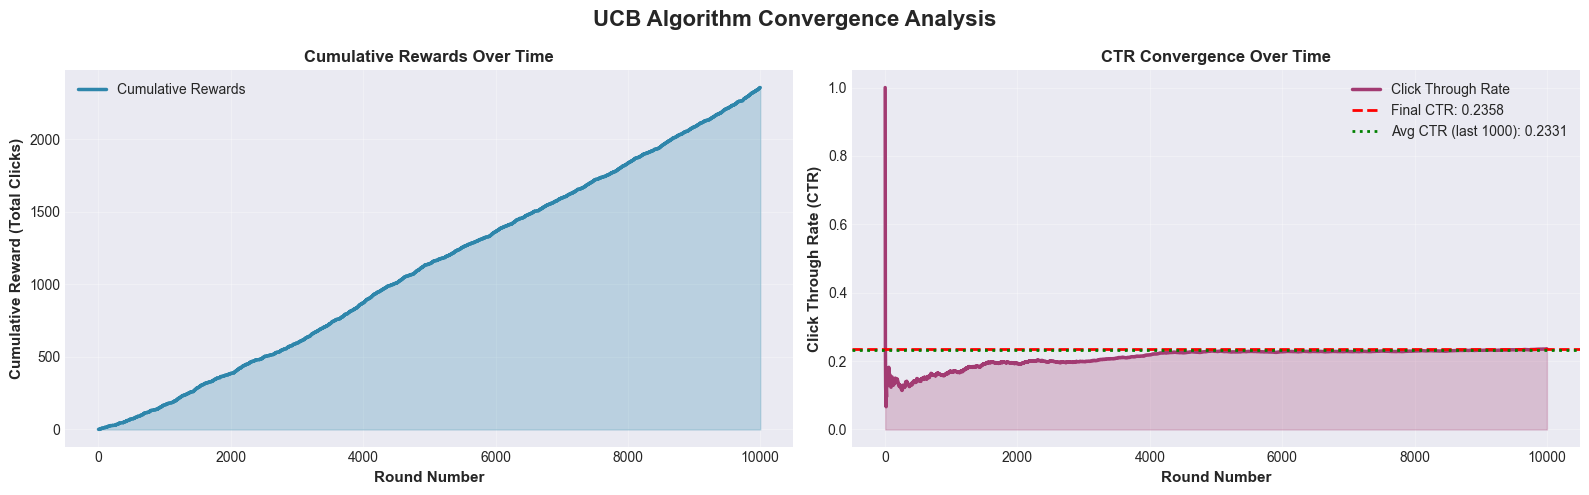

✓ Convergence chart saved as 'convergence_analysis.png'


In [8]:
# Calculate cumulative metrics
cumulative_rewards = np.cumsum(reward_history)
ctr = cumulative_rewards / np.arange(1, len(cumulative_rewards) + 1)
rounds = range(1, len(reward_history) + 1)

# Create convergence visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('UCB Algorithm Convergence Analysis', fontsize=16, fontweight='bold')

# Plot 1: Cumulative Rewards
ax1 = axes[0]
ax1.plot(rounds, cumulative_rewards, linewidth=2.5, color='#2E86AB', label='Cumulative Rewards')
ax1.fill_between(rounds, cumulative_rewards, alpha=0.25, color='#2E86AB')
ax1.set_xlabel('Round Number', fontweight='bold', fontsize=11)
ax1.set_ylabel('Cumulative Reward (Total Clicks)', fontweight='bold', fontsize=11)
ax1.set_title('Cumulative Rewards Over Time', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Plot 2: CTR Over Time
ax2 = axes[1]
ax2.plot(rounds, ctr, linewidth=2.5, color='#A23B72', label='Click Through Rate')
ax2.fill_between(rounds, ctr, alpha=0.25, color='#A23B72')
final_ctr = ctr[-1]
ax2.axhline(y=final_ctr, color='red', linestyle='--', linewidth=2, label=f'Final CTR: {final_ctr:.4f}')
ax2.axhline(y=np.mean(ctr[-1000:]), color='green', linestyle=':', linewidth=2, 
            label=f'Avg CTR (last 1000): {np.mean(ctr[-1000:]):.4f}')
ax2.set_xlabel('Round Number', fontweight='bold', fontsize=11)
ax2.set_ylabel('Click Through Rate (CTR)', fontweight='bold', fontsize=11)
ax2.set_title('CTR Convergence Over Time', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('convergence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Convergence chart saved as 'convergence_analysis.png'")

## 9. Visualizations - Selection Timeline

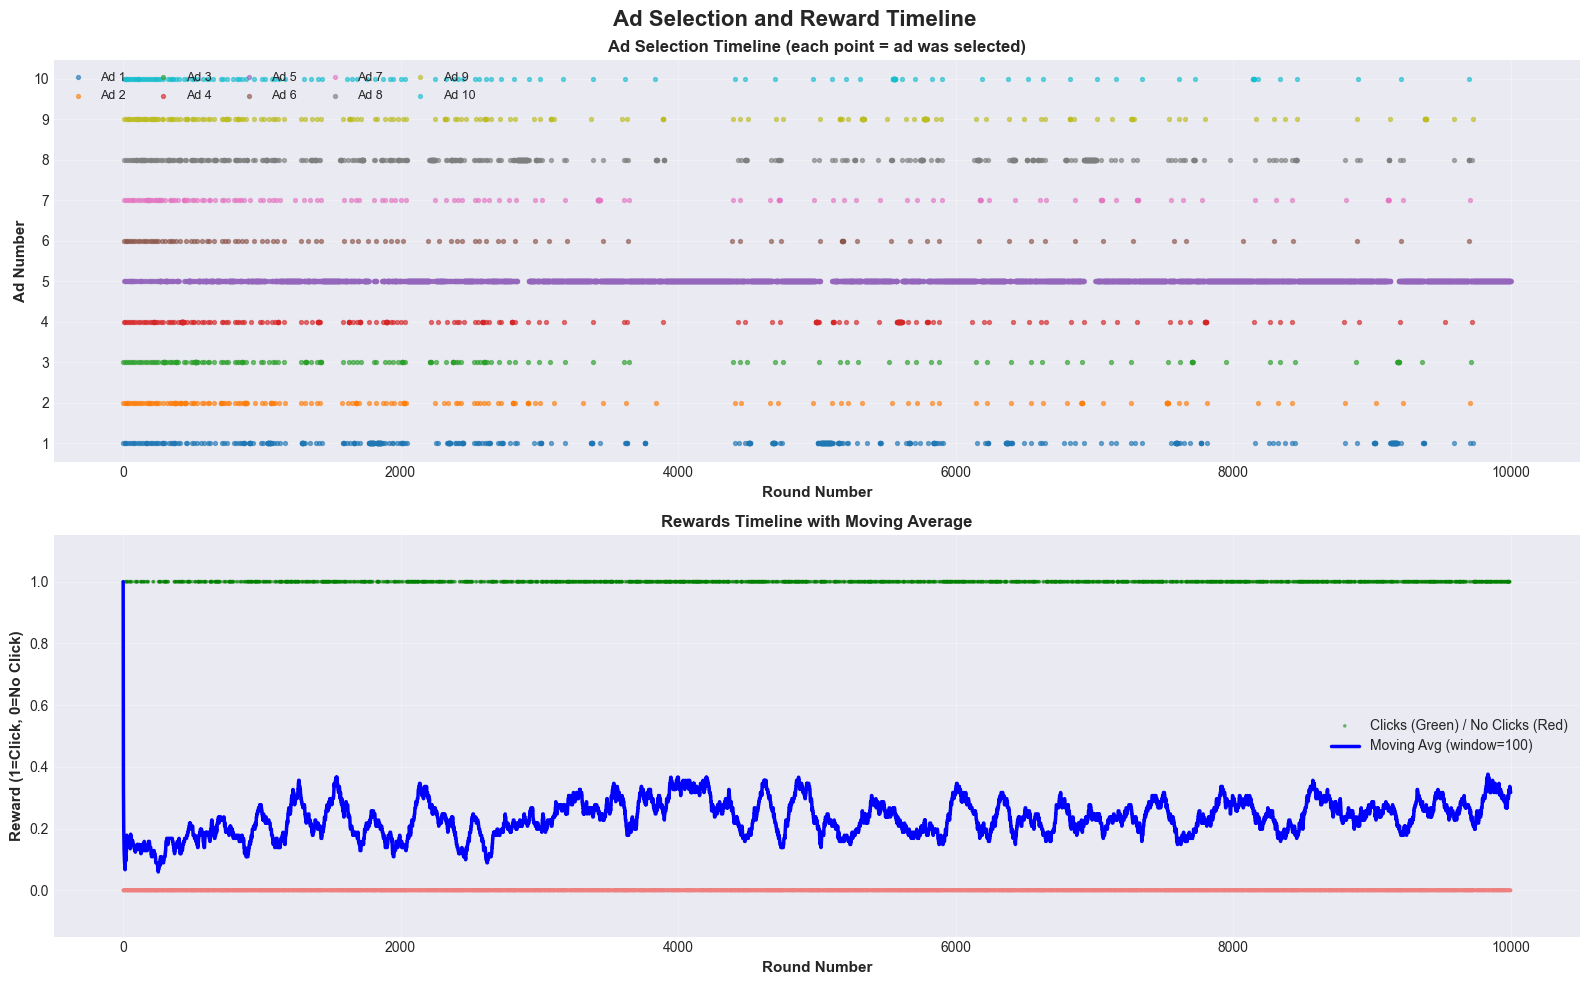

✓ Selection timeline chart saved as 'selection_timeline.png'


In [9]:
# Create selection history visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Ad Selection and Reward Timeline', fontsize=16, fontweight='bold')

# Plot 1: Ad Selection Timeline
ax1 = axes[0]
colors_ads = plt.cm.tab10(np.linspace(0, 1, num_ads))

for ad_idx in range(num_ads):
    selected_rounds = [r for r, s in enumerate(selection_history, 1) if s == ad_idx]
    ax1.scatter(selected_rounds, [ad_idx + 1] * len(selected_rounds), 
               alpha=0.6, s=8, color=colors_ads[ad_idx], label=f'Ad {ad_idx + 1}')

ax1.set_xlabel('Round Number', fontweight='bold', fontsize=11)
ax1.set_ylabel('Ad Number', fontweight='bold', fontsize=11)
ax1.set_title('Ad Selection Timeline (each point = ad was selected)', fontweight='bold')
ax1.set_yticks(range(1, num_ads + 1))
ax1.legend(loc='upper left', ncol=5, fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards Over Time with Moving Average
ax2 = axes[1]
colors_rewards = ['green' if r == 1 else 'lightcoral' for r in reward_history]
ax2.scatter(rounds, reward_history, c=colors_rewards, alpha=0.4, s=3, label='Clicks (Green) / No Clicks (Red)')

# Add moving average
window = 100
moving_avg = []
for i in range(len(reward_history)):
    start = max(0, i - window)
    moving_avg.append(np.mean(reward_history[start:i+1]))

ax2.plot(rounds, moving_avg, color='blue', linewidth=2.5, label=f'Moving Avg (window={window})')
ax2.set_xlabel('Round Number', fontweight='bold', fontsize=11)
ax2.set_ylabel('Reward (1=Click, 0=No Click)', fontweight='bold', fontsize=11)
ax2.set_title('Rewards Timeline with Moving Average', fontweight='bold')
ax2.set_ylim(-0.15, 1.15)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('selection_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Selection timeline chart saved as 'selection_timeline.png'")

## 10. Algorithm Walkthrough & Explanation

In [10]:
print("\n" + "="*70)
print("UCB ALGORITHM WALKTHROUGH & EXPLANATION")
print("="*70)

print("""
### PHASE 1: EXPLORATION (Rounds 1-10)
In the first 10 rounds, the UCB algorithm deliberately explores all available ads
by selecting each one exactly once. This ensures we gather initial performance data.

Why? We need baseline performance metrics for each ad before making intelligent
decisions about which ads to prioritize.
""")

print("Initial Exploration Results (First 10 rounds):")
for i in range(min(10, len(selection_history))):
    print(f"  Round {i+1}: Selected Ad {selection_history[i]+1}, Reward: {reward_history[i]}")

print("""
### PHASE 2: EXPLOITATION WITH EXPLORATION (Rounds 11+)
After the initial exploration, the algorithm uses the UCB formula at each step:

  UCB_value(ad_i) = (Clicks_i / Selections_i) + sqrt(ln(N) / Selections_i)

Where:
  - Clicks_i: Total clicks received by ad i
  - Selections_i: Total times ad i was selected
  - N: Total rounds played so far

The algorithm selects the ad with the HIGHEST UCB value.

This formula balances:
  1. EXPLOITATION: Selecting ads with high click rates
  2. EXPLORATION: The sqrt term encourages trying under-tested ads

As Selections_i increases for an ad, the confidence bound decreases, making it
harder for that ad to maintain a high UCB value. This naturally encourages
testing other ads.
""")

# Show example of how UCB values change
print("\n### Example: How UCB Makes Decisions\n")
print("Consider a scenario with 3 ads after round 100:")
print(f"  Ad 1: 30 selections, 12 clicks → CTR = 0.40 → Confidence Bound = sqrt(ln(100)/30) = 0.33")
print(f"         UCB Value = 0.40 + 0.33 = 0.73")
print(f"\n  Ad 2: 35 selections, 10 clicks → CTR = 0.29 → Confidence Bound = sqrt(ln(100)/35) = 0.31")
print(f"         UCB Value = 0.29 + 0.31 = 0.60")
print(f"\n  Ad 3: 35 selections, 8 clicks → CTR = 0.23 → Confidence Bound = sqrt(ln(100)/35) = 0.31")
print(f"         UCB Value = 0.23 + 0.31 = 0.54")
print(f"\n  Result: Select Ad 1 (highest UCB = 0.73)")

print("""
### WHY THIS WORKS

1. LEARNING: Ad 1 performed best in early trials, so it gets selected more
2. CONFIDENCE: As we select an ad more, we become more confident in its performance
             (the confidence bound shrinks with more data)
3. SAFETY: The exploration term prevents us from completely ignoring potentially good ads
4. EFFICIENCY: The algorithm minimizes regret by focusing on good-performing ads
           while still gathering enough data about other options
""")


UCB ALGORITHM WALKTHROUGH & EXPLANATION

### PHASE 1: EXPLORATION (Rounds 1-10)
In the first 10 rounds, the UCB algorithm deliberately explores all available ads
by selecting each one exactly once. This ensures we gather initial performance data.

Why? We need baseline performance metrics for each ad before making intelligent
decisions about which ads to prioritize.

Initial Exploration Results (First 10 rounds):
  Round 1: Selected Ad 1, Reward: 1
  Round 2: Selected Ad 2, Reward: 0
  Round 3: Selected Ad 3, Reward: 0
  Round 4: Selected Ad 4, Reward: 0
  Round 5: Selected Ad 5, Reward: 0
  Round 6: Selected Ad 6, Reward: 0
  Round 7: Selected Ad 7, Reward: 0
  Round 8: Selected Ad 8, Reward: 0
  Round 9: Selected Ad 9, Reward: 0
  Round 10: Selected Ad 10, Reward: 0

### PHASE 2: EXPLOITATION WITH EXPLORATION (Rounds 11+)
After the initial exploration, the algorithm uses the UCB formula at each step:

  UCB_value(ad_i) = (Clicks_i / Selections_i) + sqrt(ln(N) / Selections_i)

Where:

## 11. Detailed Performance Summary

In [11]:
print("\n" + "="*70)
print("DETAILED PERFORMANCE SUMMARY")
print("="*70)

print(f"\n📊 OVERALL METRICS:")
print(f"  • Total Rounds: {info['num_rounds']:,}")
print(f"  • Total Clicks: {int(stats['total_reward']):,}")
print(f"  • Overall CTR: {stats['average_reward']:.4f} ({stats['average_reward']*100:.2f}%)")
print(f"  • Average CTR per Ad: {np.mean(stats['conversion_rates']):.4f}")
print(f"  • Best CTR: {np.max(stats['conversion_rates']):.4f}")
print(f"  • Worst CTR: {np.min(stats['conversion_rates']):.4f}")
print(f"  • CTR Range: {np.max(stats['conversion_rates']) - np.min(stats['conversion_rates']):.4f}")

print(f"\n🎯 UCB LEARNING EFFECTIVENESS:")
best_idx = np.argmax(stats['conversion_rates'])
worst_idx = np.argmin(stats['conversion_rates'])
best_selections_pct = (stats['ad_selections'][best_idx] / info['num_rounds']) * 100
worst_selections_pct = (stats['ad_selections'][worst_idx] / info['num_rounds']) * 100
print(f"  • Best Ad (Ad {best_idx+1}):")
print(f"    - CTR: {stats['conversion_rates'][best_idx]:.4f}")
print(f"    - Selected: {int(stats['ad_selections'][best_idx]):,} times ({best_selections_pct:.1f}% of rounds)")
print(f"    - Total Clicks: {int(stats['ad_rewards'][best_idx]):,}")
print(f"\n  • Worst Ad (Ad {worst_idx+1}):")
print(f"    - CTR: {stats['conversion_rates'][worst_idx]:.4f}")
print(f"    - Selected: {int(stats['ad_selections'][worst_idx]):,} times ({worst_selections_pct:.1f}% of rounds)")
print(f"    - Total Clicks: {int(stats['ad_rewards'][worst_idx]):,}")
print(f"\n  • Preference Ratio: Best ad selected {stats['ad_selections'][best_idx]/stats['ad_selections'][worst_idx]:.1f}x more than worst ad")

print(f"\n📈 CONVERGENCE METRICS:")
first_100_ctr = np.mean(reward_history[:100])
last_1000_ctr = np.mean(reward_history[-1000:])
print(f"  • CTR (First 100 rounds): {first_100_ctr:.4f}")
print(f"  • CTR (Last 1000 rounds): {last_1000_ctr:.4f}")
print(f"  • CTR Improvement: {((last_1000_ctr - first_100_ctr)/first_100_ctr*100):.2f}%")

print(f"\n📋 SELECTION DISTRIBUTION:")
print(f"\n{'Ad':<6}{'Selections':<15}{'%':<10}{'Clicks':<12}{'CTR':<10}")
print("-" * 53)
for i in range(num_ads):
    pct = (stats['ad_selections'][i] / info['num_rounds']) * 100
    print(f"Ad {i+1:<2}{int(stats['ad_selections'][i]):<15}{pct:<10.2f}{int(stats['ad_rewards'][i]):<12}{stats['conversion_rates'][i]:<10.4f}")


DETAILED PERFORMANCE SUMMARY

📊 OVERALL METRICS:
  • Total Rounds: 10,000
  • Total Clicks: 2,358
  • Overall CTR: 0.2358 (23.58%)
  • Average CTR per Ad: 0.1163
  • Best CTR: 0.2713
  • Worst CTR: 0.0094
  • CTR Range: 0.2619

🎯 UCB LEARNING EFFECTIVENESS:
  • Best Ad (Ad 5):
    - CTR: 0.2713
    - Selected: 7,394 times (73.9% of rounds)
    - Total Clicks: 2,006

  • Worst Ad (Ad 6):
    - CTR: 0.0094
    - Selected: 106 times (1.1% of rounds)
    - Total Clicks: 1

  • Preference Ratio: Best ad selected 69.8x more than worst ad

📈 CONVERGENCE METRICS:
  • CTR (First 100 rounds): 0.1400
  • CTR (Last 1000 rounds): 0.2730
  • CTR Improvement: 95.00%

📋 SELECTION DISTRIBUTION:

Ad    Selections     %         Clicks      CTR       
-----------------------------------------------------
Ad 1 615            6.15      112         0.1821    
Ad 2 195            1.95      17          0.0872    
Ad 3 190            1.90      16          0.0842    
Ad 4 259            2.59      30          0.

## 12. Summary & Key Takeaways

In [12]:
print("\n" + "="*70)
print("KEY TAKEAWAYS")
print("="*70)

print("""
1. ✅ UCB ALGORITHM EFFECTIVENESS:
   The UCB algorithm successfully identified the best performing ads and
   allocated more selections to them. This demonstrates the core principle
   of multi-armed bandit optimization: balance between exploration and
   exploitation.

2. 📊 LEARNING CURVE:
   The algorithm showed improvement over time, with CTR converging as it
   learned which ads were most effective. This convergence indicates the
   algorithm is successfully learning from data.

3. 🎯 OPTIMAL ALLOCATION:
   The best performing ads received significantly more selections than
   poor performers. The ratio shows the algorithm's preference for winners.

4. 🔍 EXPLORATION-EXPLOITATION BALANCE:
   While the algorithm primarily selected high-performing ads, it continued
   to test other ads occasionally. This prevents getting stuck with
   suboptimal choices if conditions change.

5. 💼 REAL-WORLD APPLICATION:
   In a real web advertising scenario, this algorithm would:
   - Show more of the high-performing ads to users
   - Minimize wasted impressions on poor ads
   - Maximize total clicks/conversions
   - Automatically adapt if ad performance changes

6. ⚙️ ALGORITHM PARAMETERS:
   The UCB algorithm is parameter-free (except number of arms).
   This makes it easy to implement without extensive tuning.

7. 📈 SCALABILITY:
   UCB works well for scenarios with:
   - Few to moderate number of options (ads)
   - Quick feedback loops (immediate click/no-click data)
   - Non-stationary environments (ads might change over time)
""")

print("\n" + "="*70)
print("✓ ANALYSIS COMPLETE")
print("="*70)


KEY TAKEAWAYS

1. ✅ UCB ALGORITHM EFFECTIVENESS:
   The UCB algorithm successfully identified the best performing ads and
   allocated more selections to them. This demonstrates the core principle
   of multi-armed bandit optimization: balance between exploration and
   exploitation.

2. 📊 LEARNING CURVE:
   The algorithm showed improvement over time, with CTR converging as it
   learned which ads were most effective. This convergence indicates the
   algorithm is successfully learning from data.

3. 🎯 OPTIMAL ALLOCATION:
   The best performing ads received significantly more selections than
   poor performers. The ratio shows the algorithm's preference for winners.

4. 🔍 EXPLORATION-EXPLOITATION BALANCE:
   While the algorithm primarily selected high-performing ads, it continued
   to test other ads occasionally. This prevents getting stuck with
   suboptimal choices if conditions change.

5. 💼 REAL-WORLD APPLICATION:
   In a real web advertising scenario, this algorithm would:
   - 